In [1]:
import re, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from mpl_toolkits import mplot3d 

# Data Import

In [6]:
data = pd.read_csv("data2012.csv")
data = data.drop('fid',axis=1)
data.head()

,X,Y,country,fua_name,city_pop,pop2012,road_len,land_cover,night
0,4.487501,51.008333,BE,Bruxelles / Brussel,4892537,206.316861,0.001409,7,14.46
1,4.491667,51.008333,BE,Bruxelles / Brussel,4892537,845.095145,0.005011,2,11.22
2,4.495834,51.008333,BE,Bruxelles / Brussel,4892537,648.962256,0.009897,7,9.29
3,4.500001,51.008333,BE,Bruxelles / Brussel,4892537,0.000000,0.000000,2,12.30
4,4.320834,51.004166,BE,Bruxelles / Brussel,4892537,272.925815,0.000000,7,9.66


In [8]:
alist = data.columns.to_list()
alist

['X',
 'Y',
 'country',
 'fua_name',
 'city_pop',
 'pop2012',
 'road_len',
 'land_cover',
 'night']

In [9]:
alist = [ 'pop2012',  'night', 'road_len', 'land_cover', 'city_pop', 'X', 'Y', 'country', 'fua_name']
data = data[alist]

## Data Analysis

In [21]:
data['land_cover'].value_counts()

7     488187
8     199726
2      98141
9      24435
3      18102
6      14800
11     13264
4       5947
1       5819
10      5256
5       3780
Name: land_cover, dtype: int64

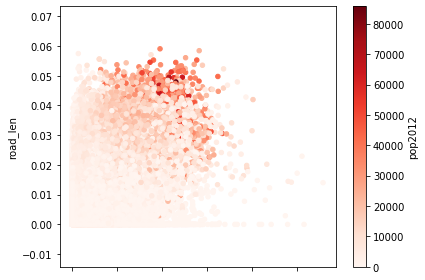

In [20]:
# Show the population distribution in Roma
data.plot(kind='scatter', x='night', y='road_len', alpha=1, c='pop2012',cmap='Reds')
plt.tight_layout()

In [13]:
# Compute pairwise correlation of columns
data.corr()

,pop2012,night,road_len,land_cover,city_pop,X,Y
pop2012,1.000000,0.624346,0.599062,-0.480085,0.108859,-0.080440,-0.039687
night,0.624346,1.000000,0.569321,-0.508134,0.163740,-0.154718,-0.181428
road_len,0.599062,0.569321,1.000000,-0.662098,0.132566,-0.114031,-0.038650
land_cover,-0.480085,-0.508134,-0.662098,1.000000,-0.126314,0.074288,-0.017135
city_pop,0.108859,0.163740,0.132566,-0.126314,1.000000,-0.508178,-0.011078
X,-0.080440,-0.154718,-0.114031,0.074288,-0.508178,1.000000,0.003793
Y,-0.039687,-0.181428,-0.038650,-0.017135,-0.011078,0.003793,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B2A59AEC8>,
      dtype=object)

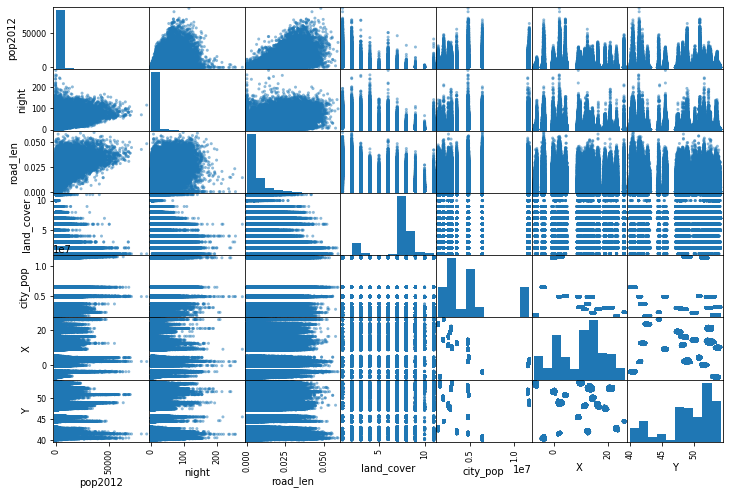

In [14]:
scatter_matrix(data,figsize=(12,8))

In [25]:
def density_scatter(x, y, label, ax=None, sort=True, bins=20, **kwargs):
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig, ax = plt.subplots()
    data, x_e, y_e = np.histogram2d(x, y, bins=bins, density=True)
    z = interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1])), \
            data , np.vstack([x,y]).T, method="splinef2d", bounds_error=False)

    # To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort:
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, **kwargs)
    ax.set_xlabel(label[0])
    ax.set_ylabel(label[1])
    norm = Normalize(vmin=np.min(z), vmax=np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

In [26]:
x = data['road_len'].to_numpy()
y = data['night'].to_numpy()
z = data['pop2012'].to_numpy()

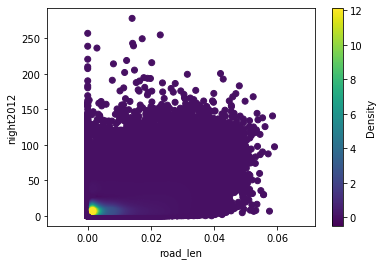

In [27]:
# 2D Version
density_scatter(x, y, label=('road_len','night2012'), bins=[20,20])

In [28]:
# %matplotlib notebook
# # calling it a second time may prevent some graphics errors
# %matplotlib notebook 

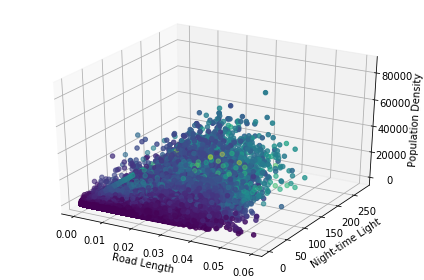

In [31]:
# 3D Version
label=('Road Length','Night-time Light','Population Density')

fig = plt.figure()
ax = plt.axes(projection='3d') 

X, Y, Z = x, y, z
c = (X + Y) * 2

ax.scatter(X, Y, Z, c=c)
ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
ax.set_zlabel(label[2])
# ax.set_xlim([0, 0.75])
# ax.set_zlim([0, 0.75])

# ax.set_title('3D Scatter Plot') 
plt.tight_layout()

## Temporary steps (Un-used for now)

In [31]:
file = "data2020.csv"
data = pd.read_csv(file)
data['pop_sum'] = data.groupby(['fua_name'])['pop2012'].transform(sum)
data['X_cen_temp'] = data['X'] * data['pop2012'] / data['pop_sum']
data['Y_cen_temp'] = data['Y'] * data['pop2012'] / data['pop_sum']
data['X_cen'] = data.groupby(['fua_name'])['X_cen_temp'].transform(sum)
data['Y_cen'] = data.groupby(['fua_name'])['Y_cen_temp'].transform(sum)

In [32]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6372800  # Earth radius in meters
    
    phi1, phi2 = np.radians(lat1), np.radians(lat2) 
    dphi       = np.radians(lat2 - lat1)
    dlambda    = np.radians(lon2 - lon1)
    
    a = np.sin(dphi/2)**2 + \
        np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    
    return 2*R*np.arctan2(np.sqrt(a), np.sqrt(1 - a))

In [33]:
data['cen_dist'] = haversine(data['X'],data['Y'],data['X_cen'],data['Y_cen'])

In [34]:
data.head()

,X,Y,fid,country,fua_name,city_pop,pop2012,road_len,land_cover,night202001,...,night202005,night202006,night202003,night202004,pop_sum,X_cen_temp,Y_cen_temp,X_cen,Y_cen,cen_dist
0,4.487501,51.008333,1,BE,Bruxelles / Brussel,4892537,206.316861,0.001409,7,16.559999,...,19.18,17.879999,20.50,22.07,7.189086e+07,0.000013,0.000146,4.332268,50.816134,27430.202966
1,4.491667,51.008333,2,BE,Bruxelles / Brussel,4892537,845.095145,0.005011,2,15.290000,...,15.13,11.850000,13.69,13.50,7.189086e+07,0.000053,0.000600,4.332268,50.816134,27724.210380
2,4.495834,51.008333,3,BE,Bruxelles / Brussel,4892537,648.962256,0.009897,7,9.360000,...,11.04,9.750000,11.70,11.72,7.189086e+07,0.000041,0.000460,4.332268,50.816134,28022.797952
3,4.500001,51.008333,4,BE,Bruxelles / Brussel,4892537,0.000000,0.000000,2,9.940000,...,10.07,10.250000,11.08,13.57,7.189086e+07,0.000000,0.000000,4.332268,50.816134,28325.820841
4,4.320834,51.004166,5,BE,Bruxelles / Brussel,4892537,272.925815,0.000000,7,7.360000,...,8.88,11.440000,14.63,12.39,7.189086e+07,0.000016,0.000194,4.332268,50.816134,20893.360675


In [35]:
data = data.drop(['pop_sum','X_cen_temp','Y_cen_temp','X_cen','Y_cen'],axis=1)
data.to_csv(file)

In [ ]:
dscb_dict = data.describe().to_dict()
night_min = 0
night_max = dscb_dict['night2012']['max']

In [ ]:
# Normalize the night-light in different time with the same standard.
alist = ['night2012',]
for col in alist:
    data_new[col] = data[col].apply(lambda x: (x - night_min) / (night_max - night_min))